In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.reset_defaults()

### **Import Data**

*The data consist of 30 feature variables and 1 target variable with 284,806 instances*

In [22]:
df = pd.read_pickle("data/df.pickle")

In [23]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834784,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.770000,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.790001,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.879997,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.000000,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.000000,0


### **Target Class** 

*The data is highly imbalanced with `99.827%` of `class 0` and `0.172%` of `class 1`. There are very few instances of class 0 which makes classification difficult. This makes the data highly skewed towards majority class*

In [24]:
print("Proportion of Target Class")
print(df["Class"].value_counts()/len(df)*100)

Proportion of Target Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


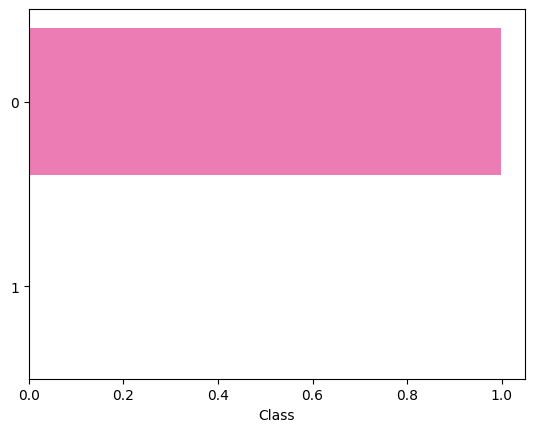

In [25]:
sns.barplot(x=df["Class"].value_counts()/len(df), y=df["Class"].unique(), orient="h", color="hotpink");

### **Statistical Summary**

*Most of the maximum and minimum values are outside of two standard deviation away from the attributes*   

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481387e+04,47488.144531,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.339397e-08,1.958696,-56.407509,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,0.000000e+00,1.651309,-72.715729,-0.598550,0.065486,0.803724,22.057730
V3,284807.0,-4.800400e-08,1.516255,-48.325588,-0.890365,0.179846,1.027196,9.382559
V4,284807.0,6.643411e-09,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875343
V5,284807.0,2.657364e-08,1.380247,-113.743309,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,-1.500125e-09,1.332271,-26.160505,-0.768296,-0.274187,0.398565,73.301628
V7,284807.0,-1.071518e-09,1.237094,-43.557243,-0.554076,0.040103,0.570436,120.589493
V8,284807.0,-1.071518e-10,1.194353,-73.216721,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.214554e-10,1.098632,-13.434067,-0.643098,-0.051429,0.597139,15.594995


### **Distributions of features**

*For the figure given below we can observe that most of the variables are `highly leptokurtic` in nature with
most of the values concentrated within a small interval around mean*

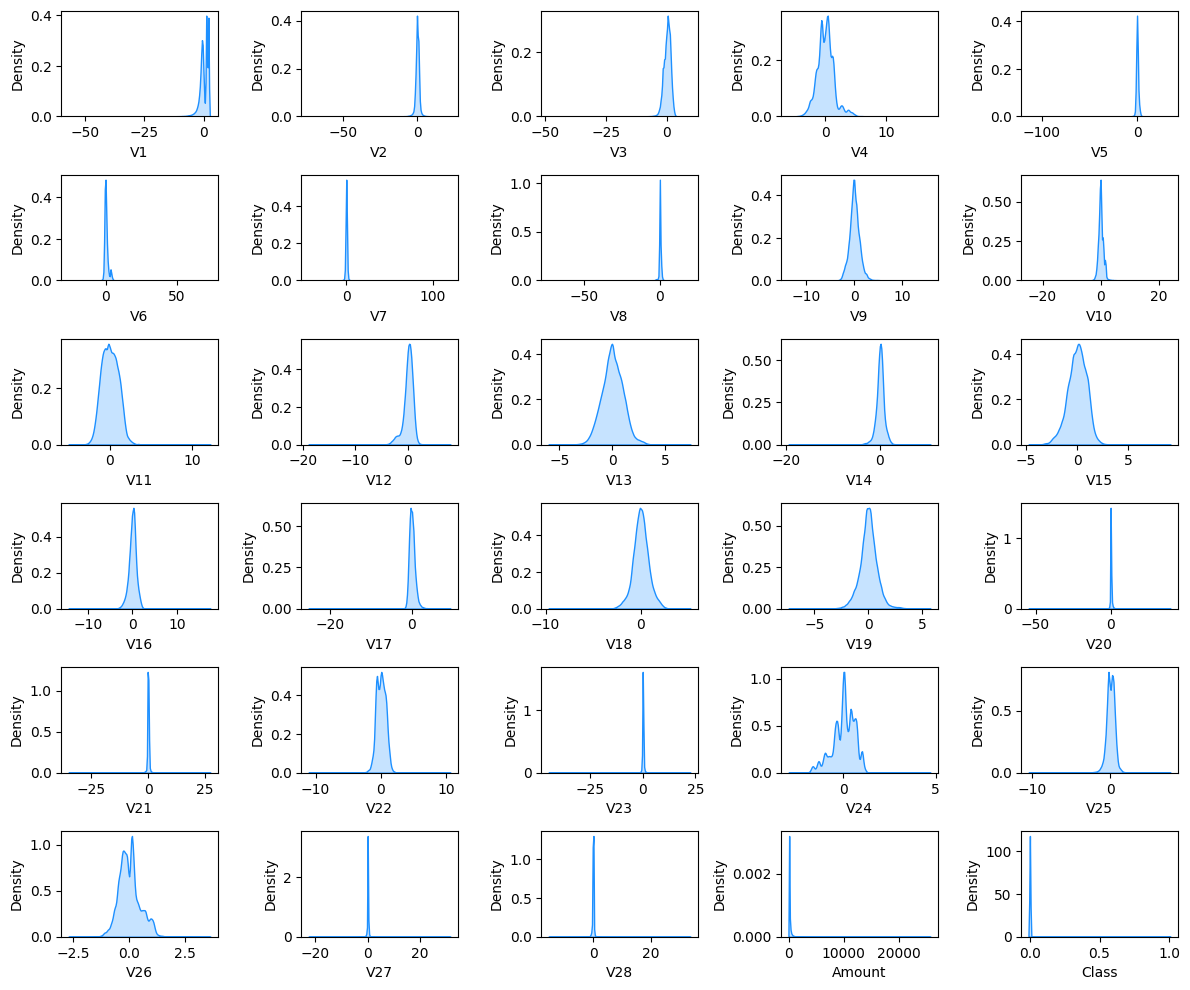

In [27]:
fig, axes = plt.subplots(6, 5, figsize=(12,10))
col = df.columns[1:]
x = 0
for r in range(6):
    for c in range(5):
        sns.kdeplot(ax=axes[r,c],x=df[col[x]], y=None,fill=True, color="dodgerblue")
        x = x + 1
plt.tight_layout()

### **Boxplots**

*From the boxplot (**fig:Attributes with outliers**) we can observe there are a large number of outliers
within attributes with some instances located far away from interquartile range*

*From the boxplot (**fig:Boxplot without outliers**) we can observe all attributes have a mean value 
approximately equal to zero but with a varying degree of standard deviation.* 

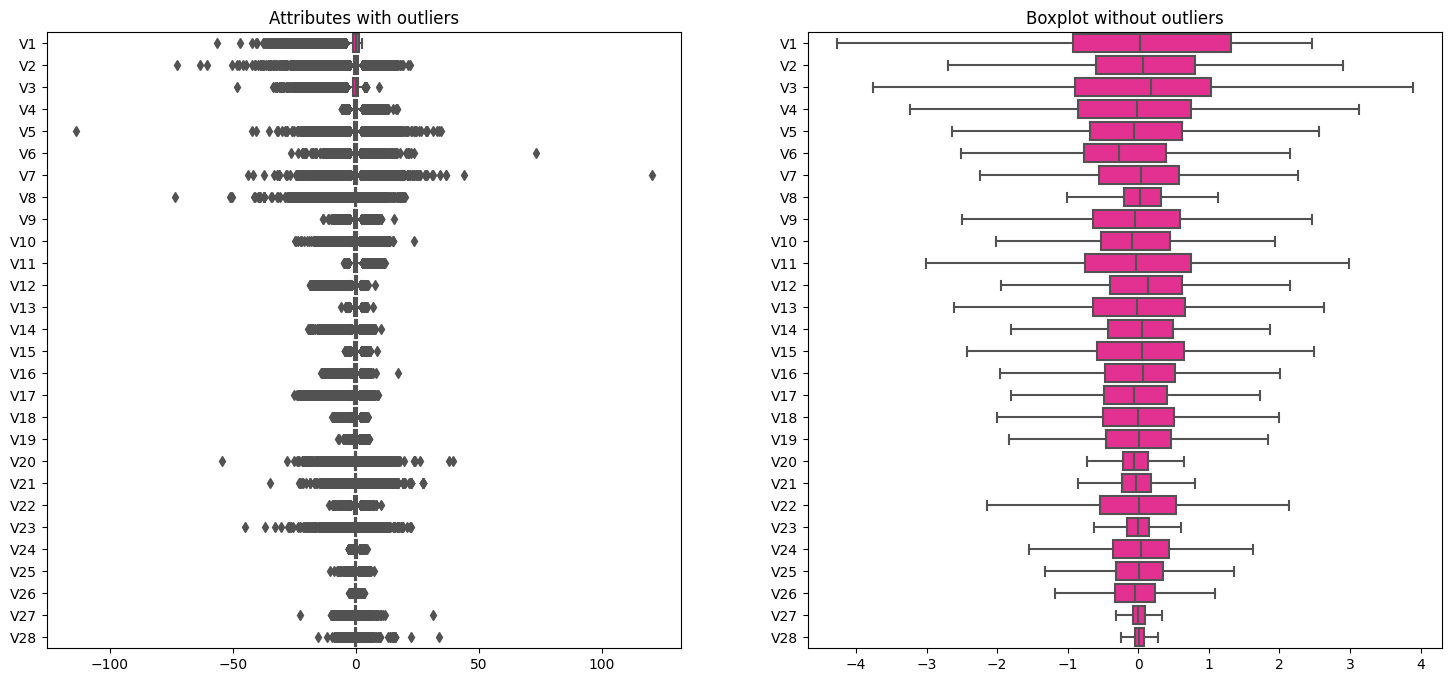

In [28]:
# boxplots
fig, ax = plt.subplots(1,2,figsize=(18,8))
sns.boxplot(data=df.iloc[:,1:-2], orient="h", color="deeppink",ax=ax[0])
ax[0].set_title("Attributes with outliers")
sns.boxplot(data=df.iloc[:,1:-2], orient="h", color="deeppink",showfliers=False, ax=ax[1])
ax[1].set_title("Boxplot without outliers");

### **Boxplot by target class** 

*Attributes `V11, V12, V14, V16, V17, V18` have unusually odd behaviour for class 1 in comparison to class 0. 
Other variables show similar behaviour for class 0 and 1.* 

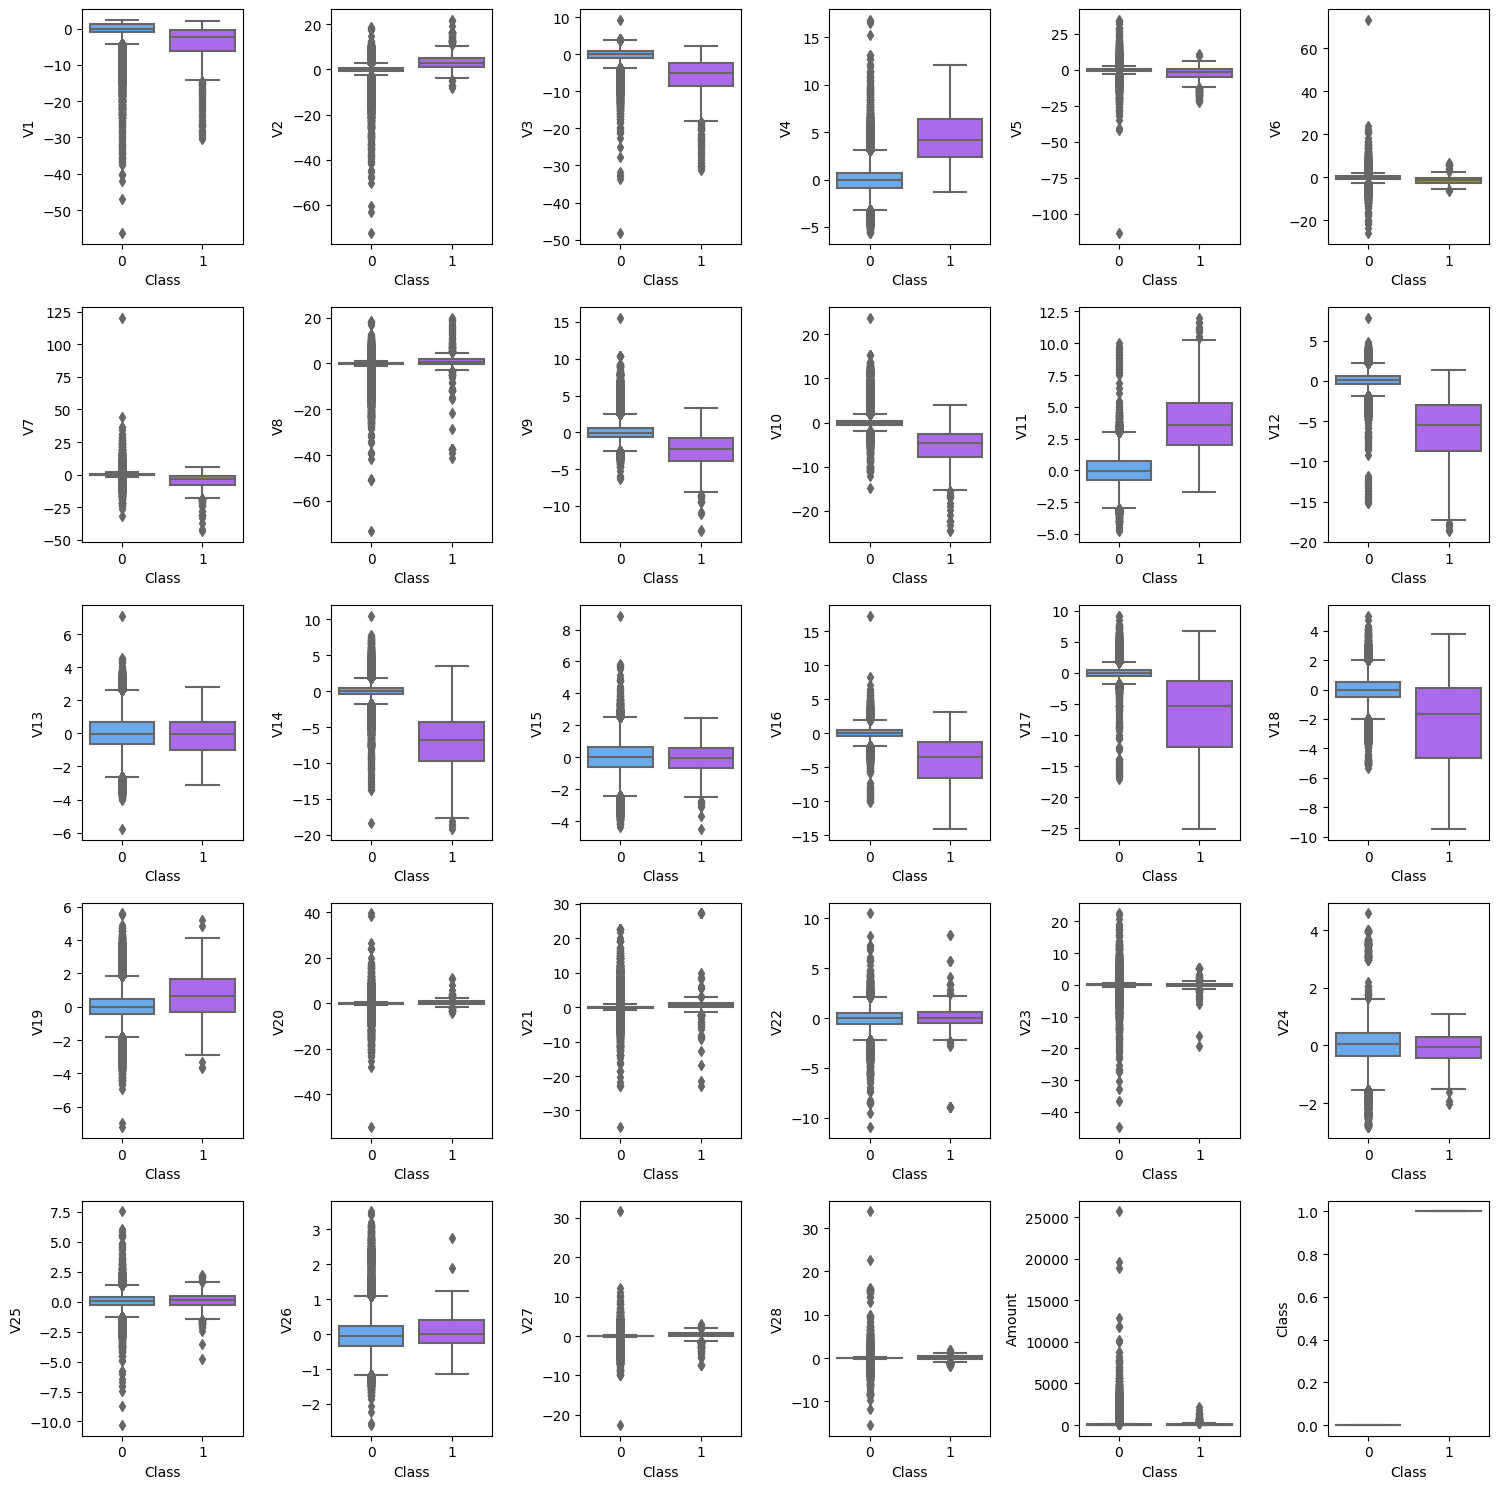

In [29]:
fig, axes = plt.subplots(5, 6, figsize=(15,15))
col = df.columns[1:]
x = 0
for r in range(5):
    for c in range(6):
        sns.boxplot(ax = axes[r,c],data=df, x="Class", y=col[x], palette="cool",)
        x = x + 1
plt.tight_layout()

### **Correlation among Variables**

*There seems no assosiation or relationship between V1-V29 but they are assosiated with `Amount` with varying 
degree. Variables `V1, V2, V3, V5, V6, V7, V20, V21` show a relatively strong assosiation with Amount in 
comparison to other variables.*  

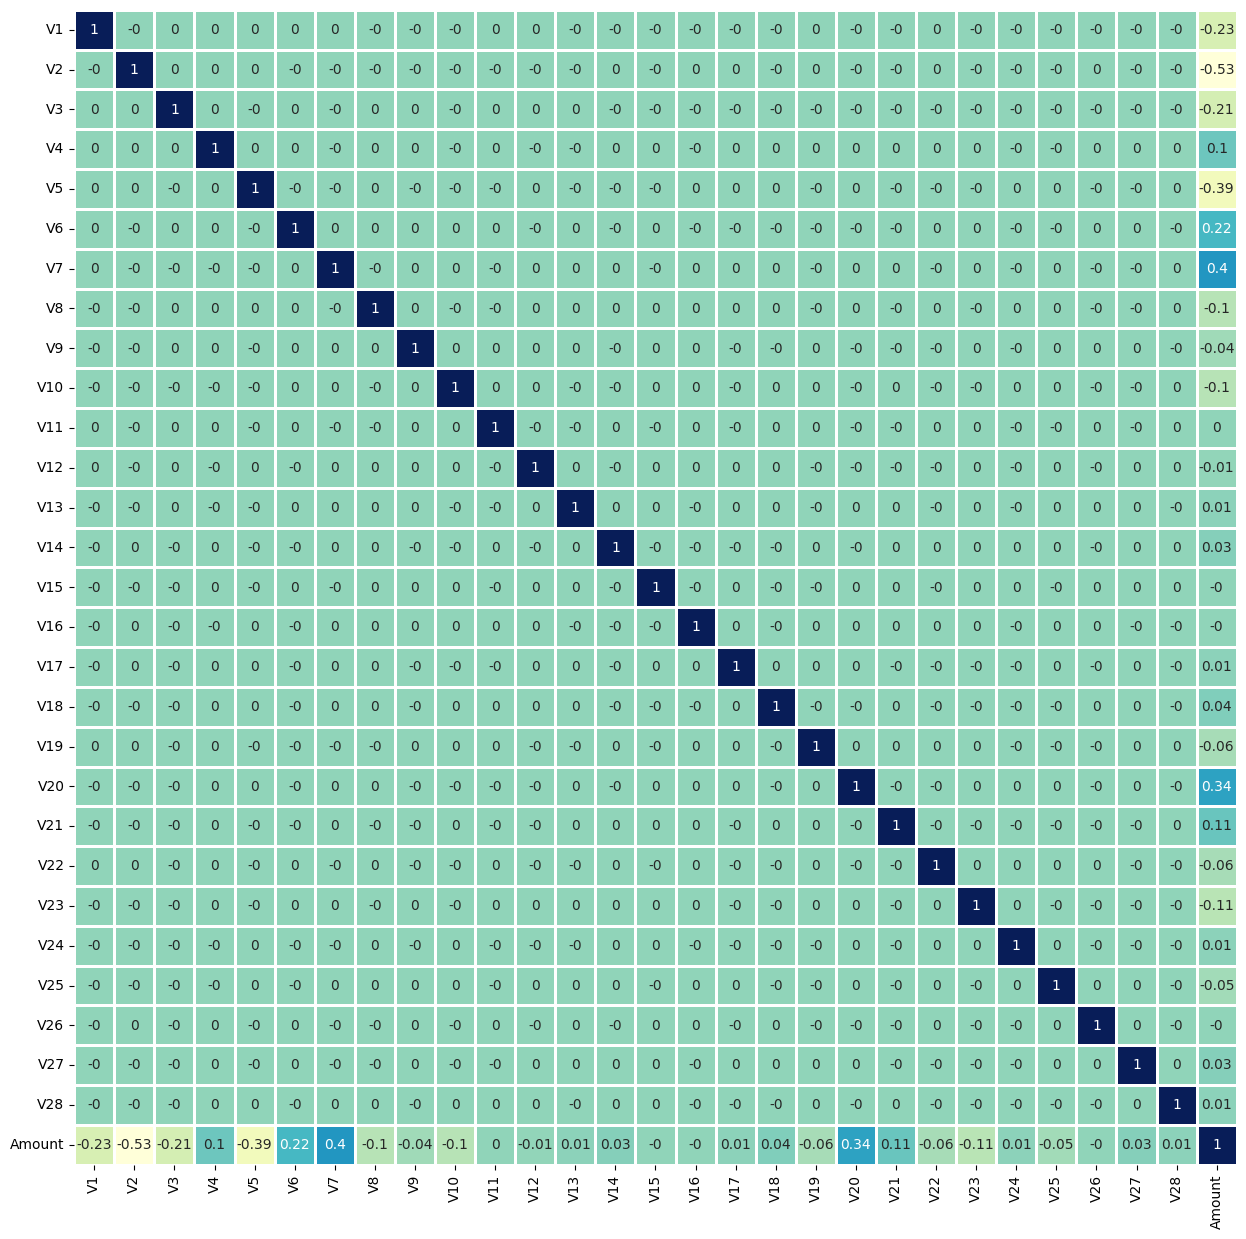

In [30]:
# heatmap
corr = np.round(df.iloc[:, 1:-1].corr(), 2)
plt.figure(figsize=(15,15))
sns.heatmap(corr , cmap="YlGnBu", linewidths=0.9, cbar=False, annot=True);

### **Baseline Model**

*We implement `decision tree` as our `baseline model` to compare performance with other models*

In [31]:
train = pd.read_pickle("data/train.pickle")
test = pd.read_pickle("data/test.pickle")

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
dtc = DecisionTreeClassifier()
dtc.fit(train.iloc[:,:-1], train["Class"])
pred = dtc.predict(test.iloc[:,:-1])
print(classification_report(pred, test["Class"]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71080
           1       0.72      0.73      0.73       122

    accuracy                           1.00     71202
   macro avg       0.86      0.86      0.86     71202
weighted avg       1.00      1.00      1.00     71202



Text(0.5, 1.0, 'Decision Tree')

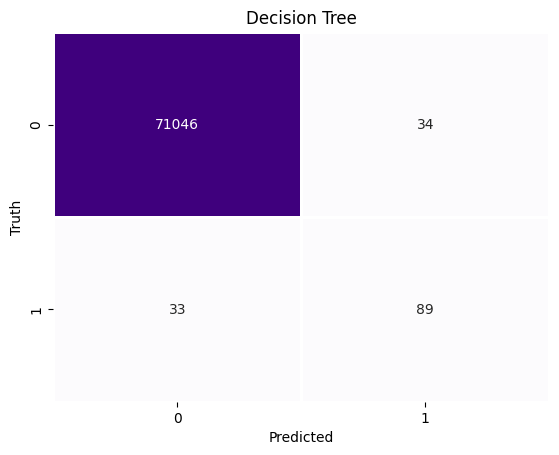

In [33]:
cm = confusion_matrix(pred, test["Class"])
ax = sns.heatmap(cm, cmap = "Purples", linewidths=0.9, cbar=False, annot=True, fmt="d")
ax.set(xlabel="Predicted", ylabel="Truth")
ax.set_title("Decision Tree")